In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt

np.random.seed(130301) # tạo seed để có thể reproduce kết quả

# 1: Implement lại các loss và r_squared bằng numpy

In [ ]:
def mse(y_true: np.array, y_pred: np.array):
    assert len(y_true) == len(y_pred), "Mismatch array length between ground truth and prediction"
    return np.sum(np.power(y_pred-y_true, 2))/len(y_true)

def rmse(y_true: np.array, y_pred: np.array):
    return np.sqrt(mse(y_true, y_pred))

def mae(y_true: np.array, y_pred: np.array):
    assert len(y_true) == len(y_pred), "Mismatch array length between ground truth and prediction"
    return np.sum(np.absolute(y_pred-y_true))/len(y_true)

def mape(y_true: np.array, y_pred: np.array):
    assert len(y_true) == len(y_pred), "Mismatch array length between ground truth and prediction"
    return np.sum(np.absolute((y_pred-y_true)/y_true))/len(y_true)


In [ ]:
a = np.array([1,2,3,4,5])
b = np.array([1,4,4,4,5])
print(mse(a,b))
print(rmse(a,b))
print(mae(a,b))
print(mape(a,b))

1.0
1.0
0.6
0.26666666666666666


# 2: Implement lại Ridge Regression

In [ ]:
class RidgeRegression:
    def __init__(self, X, y, lambda_ = 0):
        self._X = X
        self._y = y
        self._n = X.shape[0]
        self._lambda = lambda_
        
    @property
    def x(self):
        print("This is the independent variable X:")
        return self._X
    
    @property
    def y(self):
        print("This is the dependent variable y:")
        return self._y
    
    @property
    def n(self):
        print("This is the length of the data N:")
        return self._n

    @property
    def regulizator(self):
        print("This is the identity matrix multiply with the regularization factor:")
        return self._lambda
    
    @property
    def w(self):
        return self._w
    
    def fit(self, return_w = False):
        ones = np.ones((self._n, 1))
        self.new_x = np.hstack((ones, self._X))
        _X_dot_product = np.dot(self.new_x.T, self.new_x)
        regulization_matrix = np.identity(_X_dot_product.shape[0]) * self._lambda
        self._w = np.dot(
            np.linalg.inv(
                _X_dot_product + regulization_matrix
                ), 
            np.dot(self.new_x.T, self._y))
        
        if return_w:
            return self._w

    def predict(self, new_X):
        shape_x = new_X.shape[0]
        ones = np.ones((shape_x, 1))
        new_X = np.hstack((ones,new_X))
        return np.dot(new_X, self._w).reshape(1, -1)[0]

# 3 Tạo dữ liệu toy_data

In [ ]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

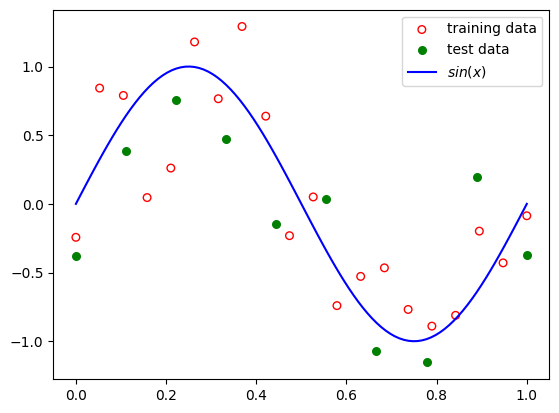

In [ ]:
x_train, y_train = create_toy_data(func, 20, 0.4)
x_test, y_test = create_toy_data(func, 10, 0.4)
space = np.linspace(0, 1, 100)
space_value = func(space)

b_x_train, b_y_train = x_train.copy(), y_train.copy() # Tạo bản copy để sử dụng với bài tập cuối

plt.scatter(x_train, y_train, facecolor="None", edgecolor="r", s=30, label="training data")
plt.scatter(x_test, y_test, facecolor="g", edgecolor="g", s=30, label="test data")
plt.plot(space, space_value, c="blue", label="$sin(x)$")
plt.legend()
plt.show()

Mình thêm phần thử nghiệm dưới đây để các bạn có hình dung tốt hơn khi fit dữ liệu

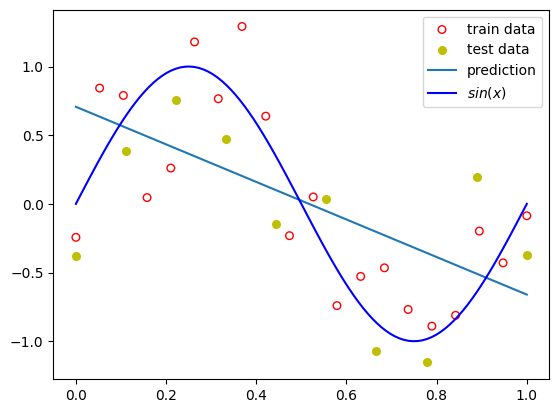

MSE loss on test data:  0.34188794447962867
RMSE loss on test data:  0.5847118473911989
MAE loss on test data:  0.481714691401469
MAPE on test data:  1.4276621582619282


In [ ]:
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
reg = RidgeRegression(x_train, y_train, lambda_=0.01)
reg.fit()
pred = reg.predict(x_test.reshape(-1, 1))

plt.scatter(x_train, y_train, facecolor="None", edgecolor="r", s=30, label="train data")
plt.scatter(x_test, y_test, facecolor="y", edgecolor="y", s=30, label="test data")
plt.plot(x_test, pred, label="prediction")
plt.plot(space, space_value, c="blue", label="$sin(x)$")
plt.legend()
plt.show()


print("MSE loss on test data: ", mse(y_test, pred))
print("RMSE loss on test data: ", rmse(y_test, pred))
print("MAE loss on test data: ", mae(y_test, pred))
print("MAPE on test data: ", mape(y_test, pred))

#3b: Lần lượt fit các model đa thức bậc 0, 1, 2,...,9

## Mình sẽ thêm 1 hàm pre-process dữ liệu để thuận tiện hơn

In [ ]:
def preprocess(x, num):
    if num == 1:
        return x
    x = x.reshape(-1, 1) # hãy chú ý khi reshape để có thể reshape khi cần.
    x_new = np.copy(x)
    for i in range(2, num+1):
        x_new = np.hstack((x_new, x**i))
    return x_new

### Chuẩn bị dữ liệu train

In [ ]:
x_1 = preprocess(x_train,1)
x_2 = preprocess(x_train,2)
x_3 = preprocess(x_train,3)
x_4 = preprocess(x_train,4)
x_5 = preprocess(x_train,5)
x_6 = preprocess(x_train,6)
x_7 = preprocess(x_train,7)
x_8 = preprocess(x_train,8)
x_9 = preprocess(x_train,9)

### Chuẩn bị dữ liệu test

In [ ]:
x_dummy = np.linspace(0, 1, 100)
x1_test = preprocess(x_dummy,1)
x2_test = preprocess(x_dummy,2)
x3_test = preprocess(x_dummy,3)
x4_test = preprocess(x_dummy,4)
x5_test = preprocess(x_dummy,5)
x6_test = preprocess(x_dummy,6)
x7_test = preprocess(x_dummy,7)
x8_test = preprocess(x_dummy,8)
x9_test = preprocess(x_dummy,9)

## Bậc 1

Ví dụ phía trên chính là lời giải cho phần này

## Bậc 2

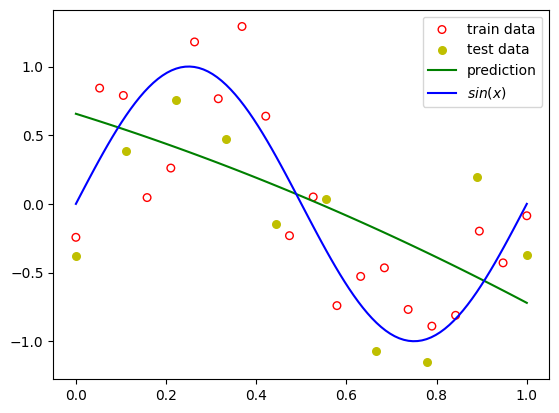

In [ ]:
reg = RidgeRegression(x_2, y_train, lambda_= 0.0)
reg.fit()
pred_2 = reg.predict(x2_test)

plt.scatter(x_train, y_train, facecolor="None", edgecolor="r", s=30, label="train data")
plt.scatter(x_test, y_test, facecolor="y", edgecolor="y", s=30, label="test data")
plt.plot(x_dummy, pred_2, color="g", label="prediction")
plt.plot(space, space_value, c="blue", label="$sin(x)$")
plt.legend()
plt.show()

## Bậc 3

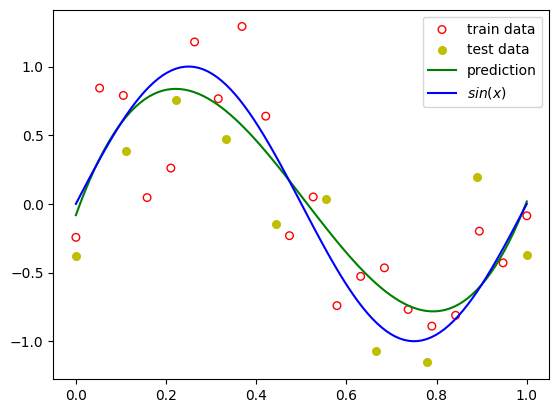

In [ ]:
reg = RidgeRegression(x_3, y_train, lambda_= 0.0)
reg.fit()
pred_3 = reg.predict(x3_test)

plt.scatter(x_train, y_train, facecolor="None", edgecolor="r", s=30, label="train data")
plt.scatter(x_test, y_test, facecolor="y", edgecolor="y", s=30, label="test data")
plt.plot(x_dummy, pred_3, color="g", label="prediction")
plt.plot(space, space_value, c="blue", label="$sin(x)$")
plt.legend()
plt.show()

## Bậc 4

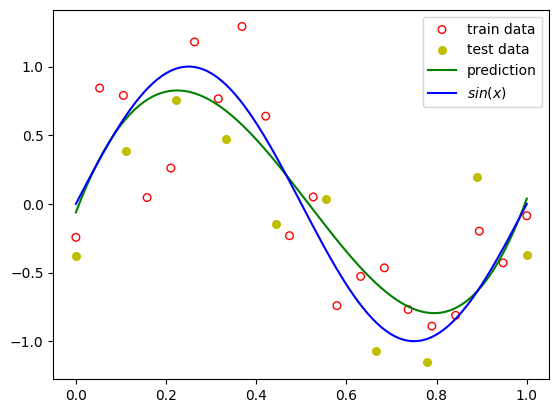

In [ ]:
reg = RidgeRegression(x_4, y_train, lambda_= 0.0)
reg.fit()
pred_4 = reg.predict(x4_test)

plt.scatter(x_train, y_train, facecolor="None", edgecolor="r", s=30, label="train data")
plt.scatter(x_test, y_test, facecolor="y", edgecolor="y", s=30, label="test data")
plt.plot(x_dummy, pred_4, color="g", label="prediction")
plt.plot(space, space_value, c="blue", label="$sin(x)$")
plt.legend()
plt.show()


## Bậc 5

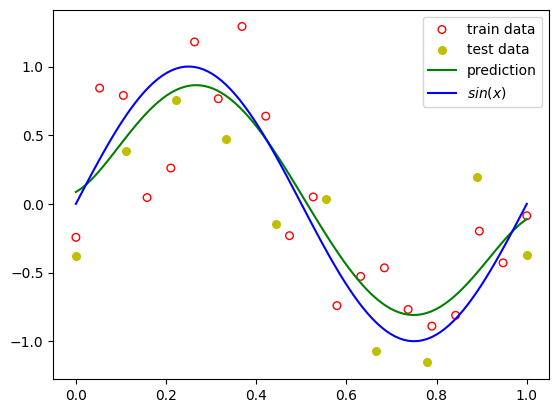

In [ ]:
reg = RidgeRegression(x_5, y_train, lambda_= 0.0)
reg.fit()
pred_5 = reg.predict(x5_test)

plt.scatter(x_train, y_train, facecolor="None", edgecolor="r", s=30, label="train data")
plt.scatter(x_test, y_test, facecolor="y", edgecolor="y", s=30, label="test data")
plt.plot(x_dummy, pred_5, color="g", label="prediction")
plt.plot(space, space_value, c="blue", label="$sin(x)$")
plt.legend()
plt.show()


## Bậc 6

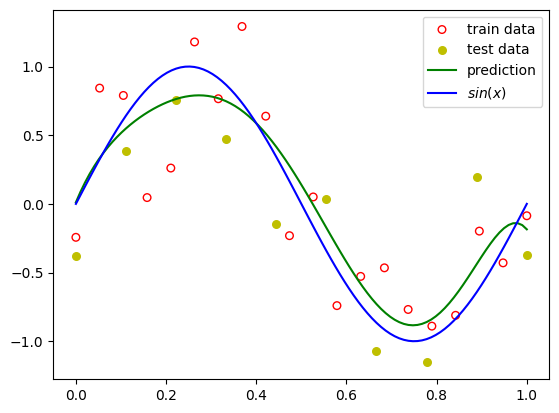

In [ ]:
reg = RidgeRegression(x_6, y_train, lambda_= 0.0)
reg.fit()
pred_6 = reg.predict(x6_test)

plt.scatter(x_train, y_train, facecolor="None", edgecolor="r", s=30, label="train data")
plt.scatter(x_test, y_test, facecolor="y", edgecolor="y", s=30, label="test data")
plt.plot(x_dummy, pred_6, color="g", label="prediction")
plt.plot(space, space_value, c="blue", label="$sin(x)$")
plt.legend()
plt.show()

## Bậc 7

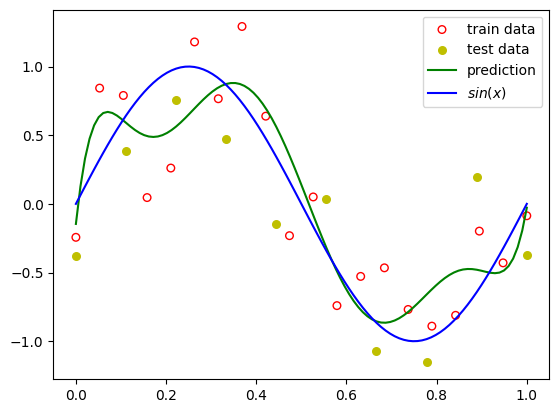

In [ ]:
reg = RidgeRegression(x_7, y_train, lambda_= 0.0)
reg.fit()
pred_7 = reg.predict(x7_test)

plt.scatter(x_train, y_train, facecolor="None", edgecolor="r", s=30, label="train data")
plt.scatter(x_test, y_test, facecolor="y", edgecolor="y", s=30, label="test data")
plt.plot(x_dummy, pred_7, color="g", label="prediction")
plt.plot(space, space_value, c="blue", label="$sin(x)$")
plt.legend()
plt.show()

## Bậc 8

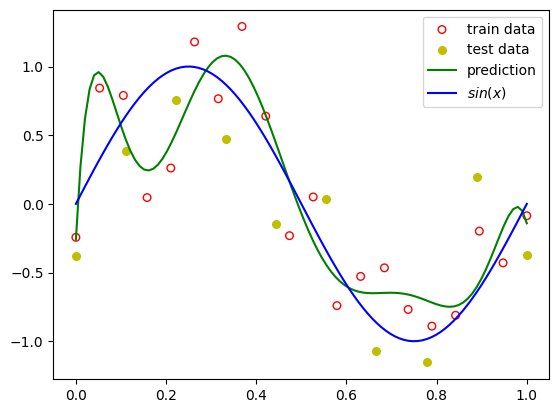

In [ ]:
reg = RidgeRegression(x_8, y_train, lambda_= 0.0)
reg.fit()
pred_8 = reg.predict(x8_test)

plt.scatter(x_train, y_train, facecolor="None", edgecolor="r", s=30, label="train data")
plt.scatter(x_test, y_test, facecolor="y", edgecolor="y", s=30, label="test data")
plt.plot(x_dummy, pred_8, color="g", label="prediction")
plt.plot(space, space_value, c="blue", label="$sin(x)$")
plt.legend()
plt.show()


## Bậc 9

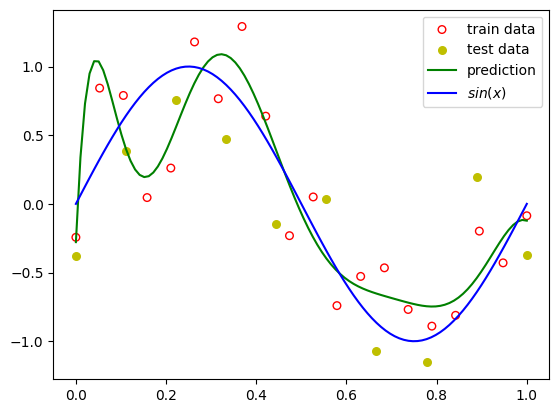

In [ ]:
reg = RidgeRegression(x_9, y_train, lambda_= 0.0)
w = reg.fit(return_w = True)
pred_9 = reg.predict(x9_test)

plt.scatter(x_train, y_train, facecolor="None", edgecolor="r", s=30, label="train data")
plt.scatter(x_test, y_test, facecolor="y", edgecolor="y", s=30, label="test data")
plt.plot(x_dummy, pred_9, color="g", label="prediction")
plt.plot(space, space_value, c="blue", label="$sin(x)$")
plt.legend()
plt.show()

Nhận xét chung, không dựa vào loss, chúng ta có thể thấy rằng với việc sử dụng đa thức bậc 1 và 2, model hoàn toàn không mang tính chất dự đoán, khi dự đoán của model sai lệch hoàn toàn với dự liệu test và không phỏng đoán được xu hướng của dữ liệu train. -> phần nào đó có thể thấy model có bias cao và variance thấp, hay nói cách khác model đang underfit

Khác với bậc 1 và 2, khi sử dụng đa thức bậc 3, 4 và 5, model gần như dự đoán chĩnh xác dữ liệu test, và phần nào xu hướng của dữ liệu train. -> phần nào đó có thể thấy model có bias và variance vừa phải.

Với các đa thức bậc cao hơn, ta có thể thấy rằng, dự đoán của mô hình bám RẤT sát với dữ liệu train, nhưng hoàn toàn thiếu đi tính ổn định khi dự đoán với dữ liệu test, phần nào đó có thể thấy, model có variance cao và bias thấp, hay model đang overfit.

<ipython-input-26-6c47fd8f1579>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


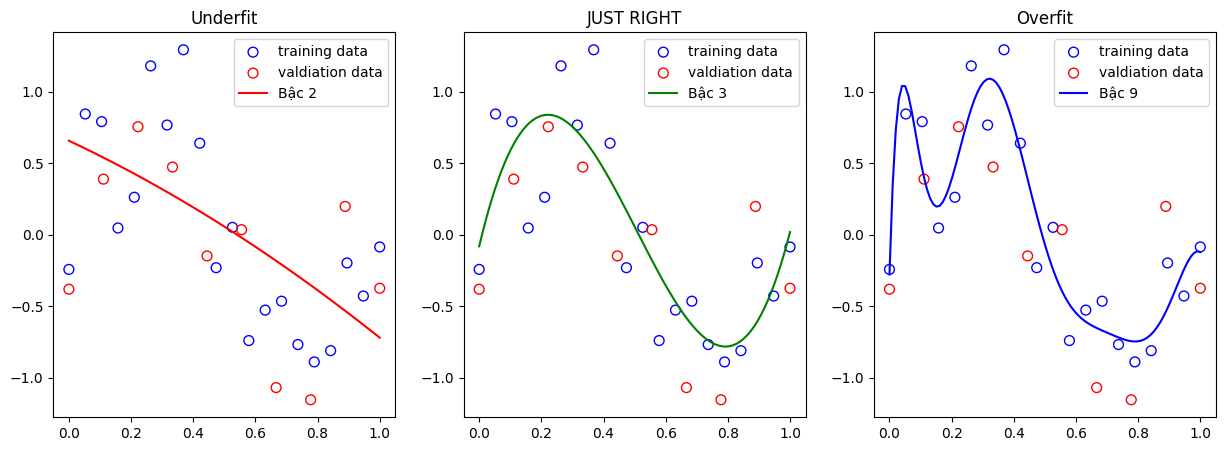

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Đánh giá")
plt.subplot(131)
plt.title("Underfit")
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_test, y_test, facecolor="none", edgecolor="r", s=50, label="valdiation data")
plt.plot(x_dummy,pred_2, c="r", label="Bậc 2")
plt.legend()

plt.subplot(132)
plt.title("JUST RIGHT")
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_test, y_test, facecolor="none", edgecolor="r", s=50, label="valdiation data")
plt.plot(x_dummy,pred_3, c="g", label="Bậc 3")
plt.legend()

plt.subplot(133)
plt.title("Overfit")
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_test, y_test, facecolor="none", edgecolor="r", s=50, label="valdiation data")
plt.plot(x_dummy,pred_9, c="b", label="Bậc 9")
plt.legend()
plt.show()

### Thử nghiệm với Ridge Regression với biến đầu vào bậc 9, và có penalty

Lambda value: 0.1


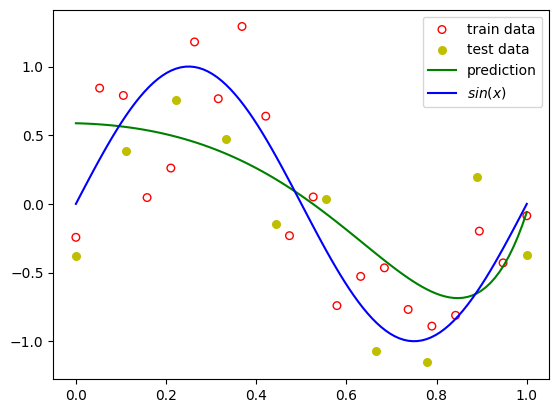

In [ ]:
#@title Interactive lambda (open in google colab to use, not sure if this could run on your local notebook, you can open this directly via Google Drive)){"run": "auto", "display-mode": "form"}
lambda_value = 0.1 #@param {type:"slider", min:0, max:10, step:0.05}
print("Lambda value:", lambda_value)

reg = RidgeRegression(x_9, y_train, lambda_= lambda_value)
w = reg.fit(return_w = True)
pred_9_penalty = reg.predict(x9_test)

plt.scatter(x_train, y_train, facecolor="None", edgecolor="r", s=30, label="train data")
plt.scatter(x_test, y_test, facecolor="y", edgecolor="y", s=30, label="test data")
plt.plot(x_dummy, pred_9_penalty, color="g", label="prediction")
plt.plot(space, space_value, c="blue", label="$sin(x)$")
plt.legend()
plt.show()

### Thử nghiệm với model bậc 9, với dữ liệu được thêm vào

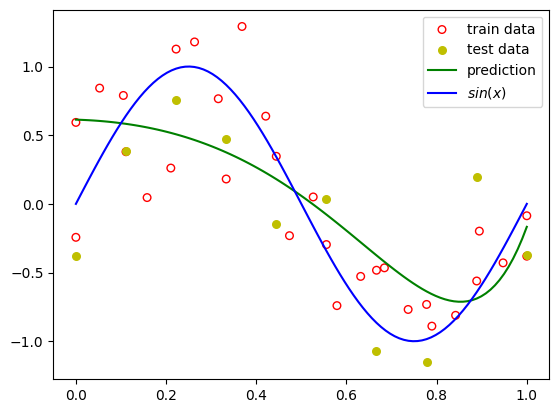

In [ ]:
#@title Interactive lambda {"run": "auto", "display-mode": "form"}
lambda_value = 0.1 #@param {type:"slider", min:0, max:10, step:0.05}
addin_sample = 10 #@param [10, 90] {type:"raw"}

# Tạo thêm dữ liệu
adding_x_train, adding_y_train = create_toy_data(func, addin_sample, 0.3)

# Chồng dữ liệu 
new_x_train = np.concatenate((b_x_train, adding_x_train), axis=0)
new_y_train = np.concatenate((b_y_train, adding_y_train), axis=0)


plt.scatter(new_x_train, new_y_train, facecolor="None", edgecolor="r", s=30, label="train data")

# Chuẩn bị dữ liệu
new_x_train = preprocess(new_x_train, 9)


reg = RidgeRegression(new_x_train, new_y_train, lambda_= lambda_value)
w = reg.fit(return_w = True)
pred_w_new_data = reg.predict(x9_test)

plt.scatter(x_test, y_test, facecolor="y", edgecolor="y", s=30, label="test data")
plt.plot(x_dummy, pred_w_new_data, color="g", label="prediction")
plt.plot(space, space_value, c="blue", label="$sin(x)$")
plt.legend()
plt.show()



